In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# tasks = ["Ackley", "Rastrigin", "Rosenbrock", "Levy"]
tasks = ["Ackley", "Rastrigin", "Levy"]
# buffer_sizes = [500, 1000, 500, 500]
buffer_sizes = [500, 1000, 500]
# dims = [200, 400]
dims = [200, 400]
n_init = 200
batch_size = 100
max_evals = 10000
number_of_seeds = 4

In [3]:
# methods = ["turbo", "ddom", "cmaes", "pibo"]
methods = ["cmaes", "pibo"]
# names = ["TuRBO", "DDOM", "CMA-ES", "Ours"]
names = ["CMA-ES", "Ours"]
# colors = ["royalblue", "forestgreen", "mediumorchid", "purple"]
colors = ["mediumorchid", "purple"]
performance = np.zeros((len(tasks), len(dims), len(methods), number_of_seeds, max_evals))
for i in range(len(tasks)):
    for j in range(len(dims)):
        for k in range(len(methods)):
            for seed in range(number_of_seeds):
                if methods[k] == "pibo" :
                    results = np.load(f"results/{methods[k]}/{methods[k]}_{tasks[i]}_{dims[j]}_{seed}_{n_init}_{batch_size}_{max_evals}_{max_evals}_{buffer_sizes[i]}.npy")
                else:
                    results = np.load(f"results/{methods[k]}/{methods[k]}_{tasks[i]}_{dims[j]}_{seed}_{n_init}_{max_evals}_{max_evals}.npy")
                
                if methods[k] == "turbo":
                    results = -np.minimum.accumulate(results)
                else:
                    results = np.maximum.accumulate(results)
                performance[i, j, k, seed] = results.flatten()

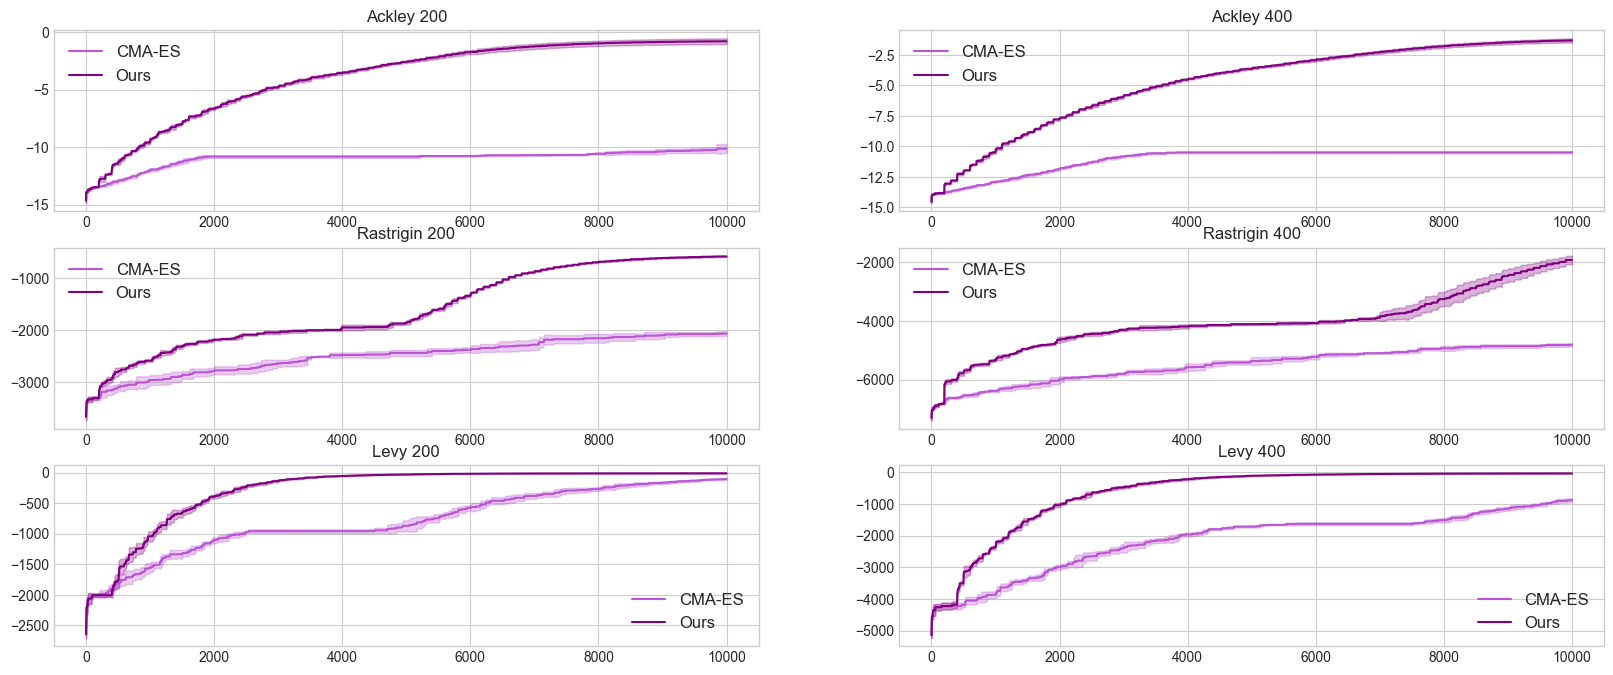

In [4]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(len(dims), len(tasks), figsize=(20, 8))
for i in range(len(dims)):
    for j in range(len(tasks)):
        for k in range(len(methods)):
            # print(np.mean(performance[i, j, k], axis=0).shape, methods[k])
            mean = np.mean(performance[i, j, k], axis=0)
            std = np.std(performance[i, j, k], axis=0)
            ax[i, j].plot(mean, label=names[k], color=colors[k])
            ax[i, j].fill_between(range(max_evals), mean - std, mean + std, color=colors[k], alpha=0.3)
        ax[i, j].set_title(f"{tasks[i]} {dims[j]}")
        ax[i, j].legend(fontsize=12)